# Machine Learning

In this part we will assess ML model

# Final modeling with Extracted Features from EDA

- Linear Regression
- Random Forest

In [175]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
data=pd.read_csv('../dataset/extracted/feature_extracted.csv')
data.head(2)

,Movie_Title,Movie_ID,Budget,Cast,Crew,Studios,Genre,Keywords,Languages,Countries,...,crewsTeamRank,NumTopCrew,HasTopCrew,NumStudios,StudioRank,NumTopStudios,HasTopStudio,CountryRank,keywordRank,cerRank
0,Star Wars: Episode VII - The Force Awakens,2488496,245000000,"['Daisy Ridley', 'John Boyega', 'Oscar Isaac',...","['Lawrence Kasdan', 'Michael Arndt', 'J.J. Abr...","['Lucasfilm', 'Bad Robot', 'Truenorth Producti...","['Action', 'Adventure', 'Sci-Fi']","['reboot', 'sanitation employee', 'remake', 'c...",['English'],['United States'],...,2106,3,1,3,935,2,1,4,158,5
1,Frozen II,4520988,150000000,"['Kristen Bell', 'Idina Menzel', 'Josh Gad', '...","['Jennifer Lee', 'Hans Christian Andersen', 'C...","['Walt Disney Animation Studios', 'Walt Disney...","['Animation', 'Adventure', 'Comedy', 'Family',...","['autumn', 'anthropomorphic snowman', 'princes...",['English'],['United States'],...,124,0,0,2,742,2,1,4,165,3


In [176]:
data.columns

Index(['Movie_Title', 'Movie_ID', 'Budget', 'Cast', 'Crew', 'Studios', 'Genre',
       'Keywords', 'Languages', 'Countries', 'Release_Data', 'Runtime',
       'Gross_worldwide', 'Rating', 'Rating_Count', 'ListOfCertificate',
       'Release_Year', 'Release_Month', 'Release_Day', 'GenreRank',
       'SpecialMonth', 'CastsRank', 'NumLeadActors', 'HasTop50Actors',
       'NumCrews', 'crewsTeamRank', 'NumTopCrew', 'HasTopCrew', 'NumStudios',
       'StudioRank', 'NumTopStudios', 'HasTopStudio', 'CountryRank',
       'keywordRank', 'cerRank'],
      dtype='object')

Drop **str** column

In [177]:
for index in data.columns:
    if type(data[index][0])== str:
        data=data.drop(index,axis=1)
# Drop Movie_ID, Rating, Rating_Count
data.drop(['Movie_ID','Rating','Rating_Count','Release_Day','Release_Month'],axis=1,inplace=True)
data.head(2)

,Budget,Runtime,Gross_worldwide,Release_Year,GenreRank,SpecialMonth,CastsRank,NumLeadActors,HasTop50Actors,NumCrews,crewsTeamRank,NumTopCrew,HasTopCrew,NumStudios,StudioRank,NumTopStudios,HasTopStudio,CountryRank,keywordRank,cerRank
0,245000000,138,2069521700,2015,17.666667,1,39104,8,1,3,2106,3,1,3,935,2,1,4,158,5
1,150000000,103,1450026933,2019,17.500000,1,27800,2,0,3,124,0,0,2,742,2,1,4,165,3


Correlation Plot

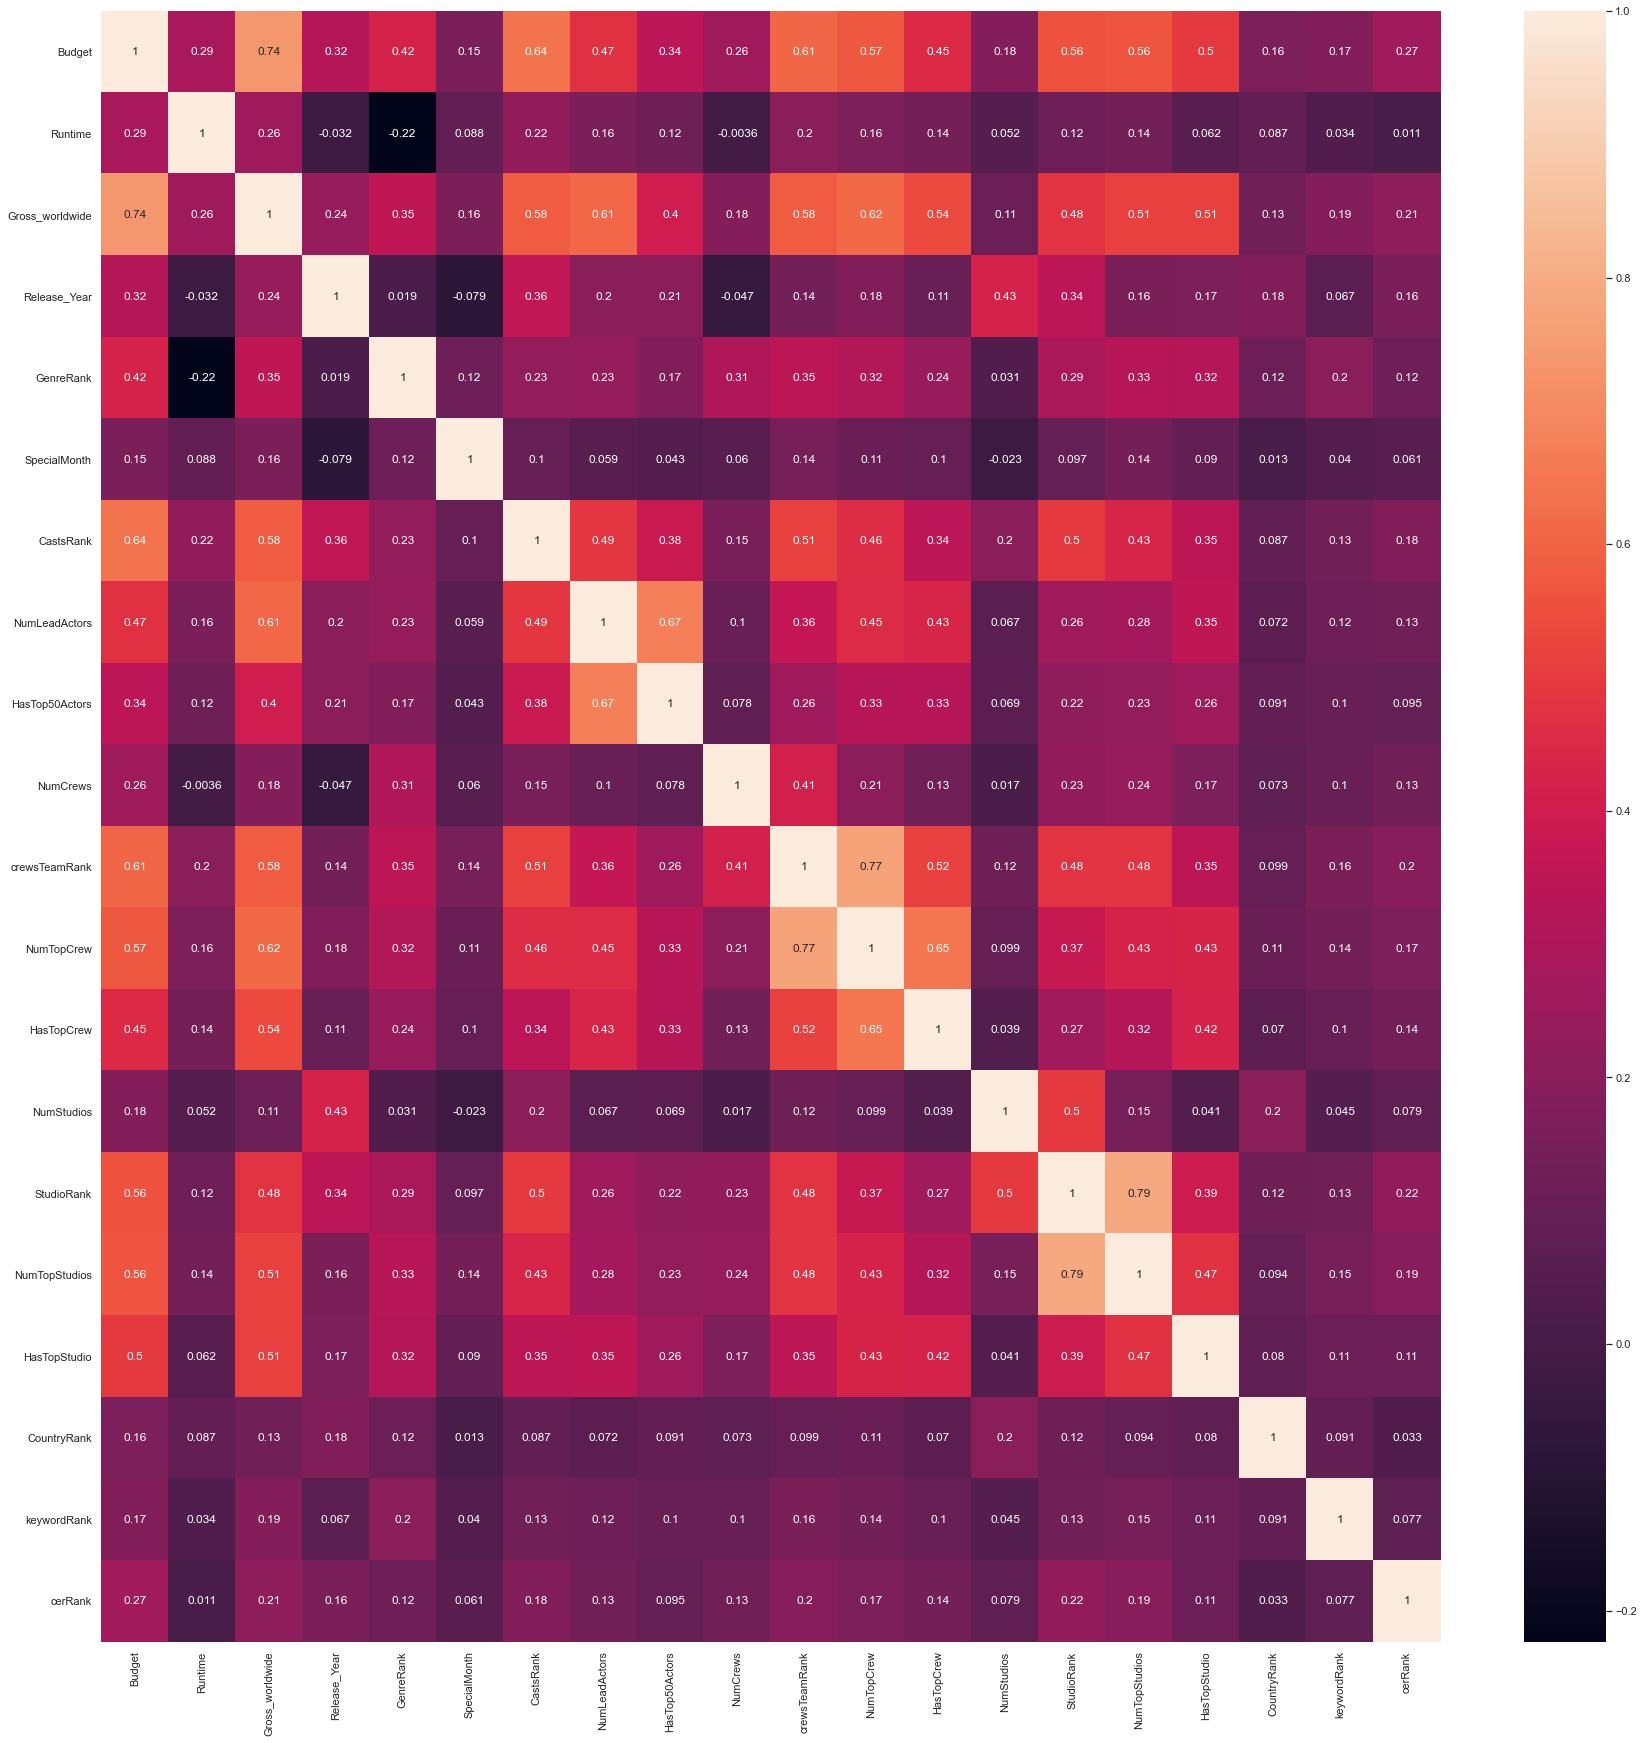

In [178]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True)
plt.show()

Top correlation with **Gross_worldwide**

In [179]:
data.corr()['Gross_worldwide'].sort_values(ascending=False)

Gross_worldwide    1.000000
Budget             0.738403
NumTopCrew         0.616953
NumLeadActors      0.611519
crewsTeamRank      0.583299
CastsRank          0.582852
HasTopCrew         0.538546
NumTopStudios      0.513710
HasTopStudio       0.508838
StudioRank         0.477094
HasTop50Actors     0.400090
GenreRank          0.350344
Runtime            0.260496
Release_Year       0.240060
cerRank            0.213945
keywordRank        0.186453
NumCrews           0.184700
SpecialMonth       0.162670
CountryRank        0.127424
NumStudios         0.112112
Name: Gross_worldwide, dtype: float64

In [180]:
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [181]:
data.columns

Index(['Budget', 'Runtime', 'Gross_worldwide', 'Release_Year', 'GenreRank',
       'SpecialMonth', 'CastsRank', 'NumLeadActors', 'HasTop50Actors',
       'NumCrews', 'crewsTeamRank', 'NumTopCrew', 'HasTopCrew', 'NumStudios',
       'StudioRank', 'NumTopStudios', 'HasTopStudio', 'CountryRank',
       'keywordRank', 'cerRank'],
      dtype='object')

## Linear Regression

- With out feature engineering

In [183]:
testScore=0
mae_val=0
rmae=0
loop=100
for i in range(loop):
    lin=linear_model.LinearRegression()
    train, test = train_test_split(data,test_size=0.3)
    target=['Gross_worldwide']
    feature=['Budget','Runtime','Release_Year']
    x_train = train[feature]
    y_train = train[target]
    x_test = test[feature]
    y_test = test[target]
    lin.fit(x_train,y_train)
    y_predicted= lin.predict(x_test)
    testScore+=lin.score(x_test,y_test)
    mae_val+=mean_absolute_error(y_test,y_predicted)
    rmae+=np.sqrt(mean_squared_error(y_test,y_predicted))
else:
    testScore/=loop
    mae_val/=loop
    rmae/=loop
print("Average test score: %.2f" %testScore) 
print("MAE: ",mae_val)
print("RMAE: ",rmae)

Average test score: 0.54
MAE:  67835216.7754708
RMAE:  124826619.16531742


Mean MAE of test set with 1000 loops is 68M$ ~ 1554 Tỷ VND

- With feature engineering

In [184]:
testScore=0
mae_val=0
rmae=0
loop=100
for i in range(loop):
    lin=linear_model.LinearRegression()
    train, test = train_test_split(data,test_size=0.3)
    target=['Gross_worldwide']
    x_train = train.drop('Gross_worldwide',axis=1)
    y_train = train[target]
    x_test = test.drop('Gross_worldwide',axis=1)
    y_test = test[target]
    lin.fit(x_train,y_train)
    y_predicted= lin.predict(x_test)
    testScore+=lin.score(x_test,y_test)
    mae_val+=mean_absolute_error(y_test,y_predicted)
    rmae+=np.sqrt(mean_squared_error(y_test,y_predicted))
else:
    testScore/=loop
    mae_val/=loop
    rmae/=loop
print("Average test score: %.2f" %testScore) 
print("MAE: ",mae_val)
print("RMAE: ",rmae)

Average test score: 0.68
MAE:  59978719.57189288
RMAE:  104680362.5103846


Mean MAE of test set with 1000 loops is 60M$ ~ 1371 Tỷ VND

## Random Forest

- With feature engineering

In [185]:
from sklearn.ensemble import RandomForestRegressor

In [186]:
from sklearn.ensemble import RandomForestRegressor

lin=RandomForestRegressor(n_estimators=100)
train, test = train_test_split(data,test_size=0.3)
target=['Gross_worldwide']
x_train = train.drop('Gross_worldwide',axis=1)
y_train = train[target]
x_test = test.drop('Gross_worldwide',axis=1)
y_test = test[target]
lin.fit(x_train,y_train)
y_predicted= lin.predict(x_test)
testScore=lin.score(x_test,y_test)
mae_val=mean_absolute_error(y_test,y_predicted)
rmae=np.sqrt(mean_squared_error(y_test,y_predicted))
print("Average test score: %.2f" %testScore) 
print("MAE: ",mae_val)
print("RMAE: ",rmae)

Average test score: 0.72
MAE:  51388068.63709156
RMAE:  92844492.79695046


Mean MAE of test 53M$ ~ 1200 Tỷ Vietnam Dong